<a href="https://colab.research.google.com/github/milicaci/obuznie/blob/master/DZ_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 18, 9
import pandas as pd
import numpy as np
import seaborn as sns

In [40]:
schaste_2019 = pd.read_csv('2019.csv', sep=',').value_counts().reset_index()
schaste_2019_ru = schaste_2019.rename(columns={'Overall rank': 'Ранг', 'Country or region': 'Страна или регион',
                                      'Score': 'Оценка', 'GDP per capita': 'ВВП на душу населения',
                                      'Social support': 'Социальная поддержка', 
                                      'Healthy life expectancy': 'Ожидаемая продолжительность здоровой жизни',
                                      'Freedom to make life choices': 'Свобода делать жизненный выбор', 'Generosity': 'Щедрость',
                                      'Perceptions of corruption': 'Восприятие коррупции'})
schaste_2019_ru['Год'] = '2019-00-00'
#schaste_2019_ru

In [42]:
schaste_2018 = pd.read_csv('2018.csv', sep=',').value_counts().reset_index()
schaste_2018_ru = schaste_2018.rename(columns={'Overall rank': 'Ранг', 'Country or region': 'Страна или регион',
                                      'Score': 'Оценка', 'GDP per capita': 'ВВП на душу населения',
                                      'Social support': 'Социальная поддержка', 
                                      'Healthy life expectancy': 'Ожидаемая продолжительность здоровой жизни',
                                      'Freedom to make life choices': 'Свобода делать жизненный выбор', 'Generosity': 'Щедрость',
                                      'Perceptions of corruption': 'Восприятие коррупции'})
schaste_2018_ru['Год'] = '2018-00-00'
#schaste_2018_ru

In [43]:
schaste_2017 = pd.read_csv('2017.csv', sep=',').value_counts().reset_index()
schaste_2016 = pd.read_csv('2016.csv', sep=',').value_counts().reset_index()
schaste_2015 = pd.read_csv('2015.csv', sep=',').value_counts().reset_index()

In [9]:
#schaste_2019_ru.info()
#schaste_2018_ru.info()
#schaste_2017.info()
#schaste_2016.info()
#schaste_2015.info()

In [44]:
df2019 = schaste_2019_ru[0:156]
df2018 = schaste_2018_ru[0:155]
schaste_all = pd.concat([df2019,df2018], ignore_index=True)
schaste_all

,Ранг,Страна или регион,Оценка,ВВП на душу населения,Социальная поддержка,Ожидаемая продолжительность здоровой жизни,Свобода делать жизненный выбор,Щедрость,Восприятие коррупции,0,Год
0,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091,1,2019-00-00
1,49,Cyprus,6.046,1.263,1.223,1.042,0.406,0.190,0.041,1,2019-00-00
2,56,Jamaica,5.890,0.831,1.478,0.831,0.490,0.107,0.028,1,2019-00-00
3,55,Estonia,5.893,1.237,1.528,0.874,0.495,0.103,0.161,1,2019-00-00
4,54,South Korea,5.895,1.301,1.219,1.036,0.159,0.175,0.056,1,2019-00-00
...,...,...,...,...,...,...,...,...,...,...,...
306,104,Palestinian Territories,4.743,0.642,1.217,0.602,0.266,0.086,0.076,1,2018-00-00
307,103,Gabon,4.758,1.036,1.164,0.404,0.356,0.032,0.052,1,2018-00-00
308,102,Venezuela,4.806,0.996,1.469,0.657,0.133,0.056,0.052,1,2018-00-00
309,101,Nepal,4.880,0.425,1.228,0.539,0.526,0.302,0.078,1,2018-00-00


# **1. Соотношение ВВП на душу населения к ожидаемой продолжительности здоровой жизни по странам в 2019 году.**

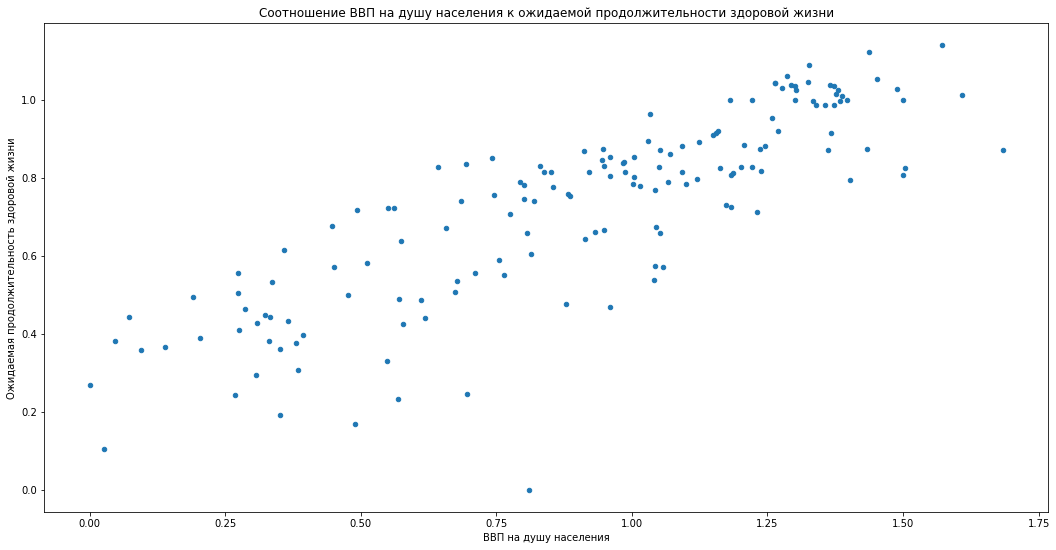

In [45]:
schaste_2019_ru.plot(kind ='scatter', 
        x = 'ВВП на душу населения', 
        y = 'Ожидаемая продолжительность здоровой жизни', 
        title = 'Соотношение ВВП на душу населения к ожидаемой продолжительности здоровой жизни')

**Вывод:** Как видно на диаграмме, чем больше  ВВП на душу населения, тем больше ожидаемая продолжительность здоровой жизни. 

# **2. Топ стран за 2019 год с оценкой 7 балов и выше**


In [46]:
schaste_2019_ru.describe()# определяем стандартные сводные  величины 2019


,Ранг,Оценка,ВВП на душу населения,Социальная поддержка,Ожидаемая продолжительность здоровой жизни,Свобода делать жизненный выбор,Щедрость,Восприятие коррупции,0
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.0
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603,1.0
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538,0.0
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000,1.0
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500,1.0
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250,1.0
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000,1.0


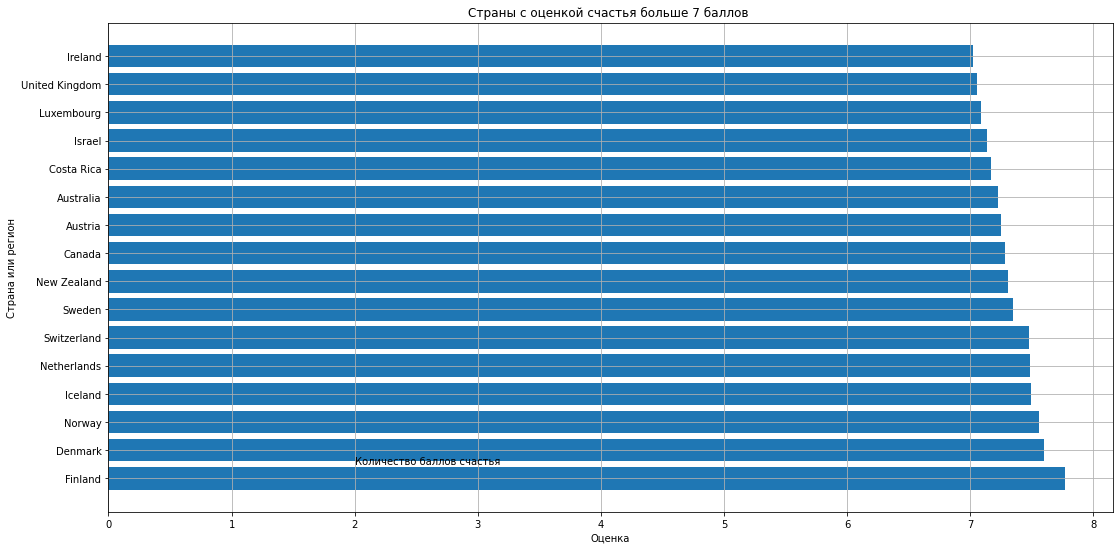

In [47]:
schaste_ozhenka = schaste_2019_ru[schaste_2019_ru['Оценка'] > 7]
#schaste_ozhenka
schaste_ozhenka_g = schaste_ozhenka.sort_values('Оценка', ascending=False)[['Страна или регион', 'Оценка']]
#schaste_ozhenka_g
plt.barh(schaste_ozhenka_g['Страна или регион'], schaste_ozhenka_g['Оценка'])
plt.xlabel('Оценка') 
plt.ylabel('Страна или регион')
plt.title('Страны с оценкой счастья больше 7 баллов ')
plt.text(2, 0.5, 'Количество баллов счастья')
plt.grid()

**Вывод:** Сама счастливая страна  в 2019 году Финляндия, замыкает топ Ирладния.

# 3. Димамика  показателей счастья людей: Свобода делать жизненный выбор, ВВП на душу населения и Щедрость за 2018 и 2019 года.

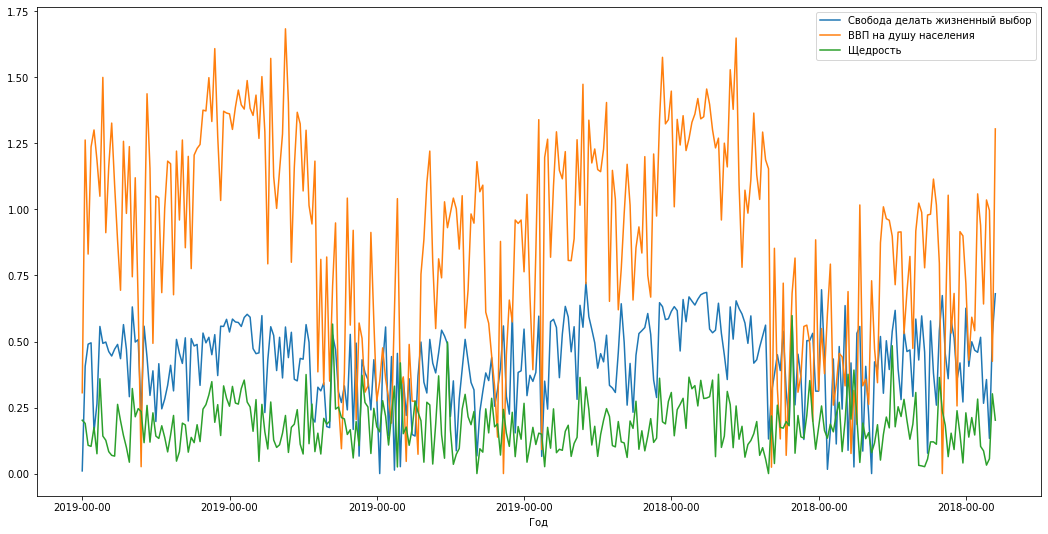

In [48]:
schaste_all.plot(x ='Год', y = ['Свобода делать жизненный выбор','ВВП на душу населения', 'Щедрость' ])
plt.show()

**Вывод**: Показатели ВВП на душу населения и Свобода делать жизненный выбор выросли  в 2019 г. по сравнениею с 2018 году. В то же время показатель щедрость имеет денденцию к понижению. 

## 4. Социальная поддержка и Оценка в 2018 и 2019 годах в диаграмме плотности.




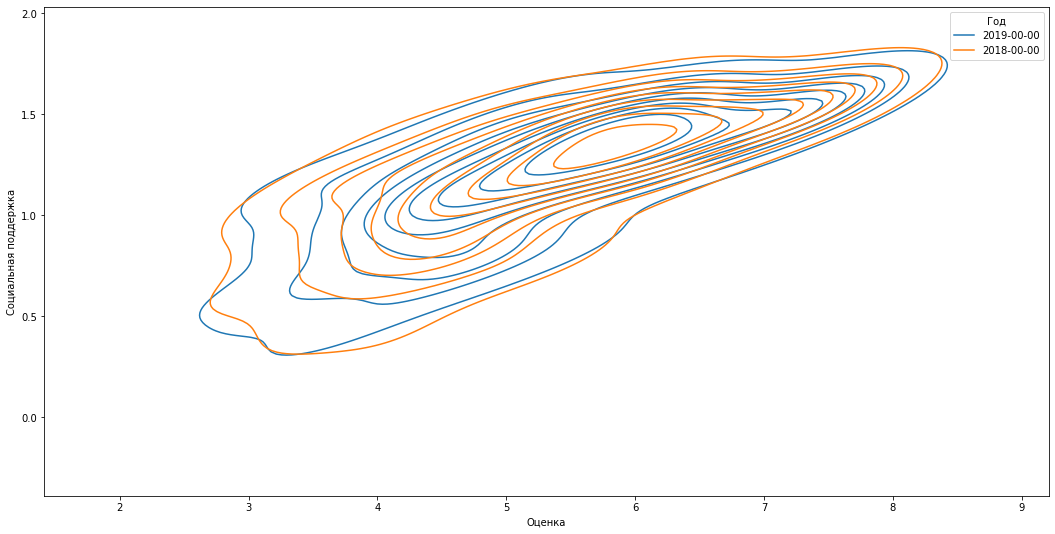

In [50]:
sns.kdeplot(data = schaste_all, x= 'Оценка', y= 'Социальная поддержка' , hue ='Год')

**Вывод:** Показатели Социальная поддержка и Оценка за 2019 и 2018 года изменились, так как плотность исходя из данных диаграммы  не совпадает. Тенденция к тому что при большей оценке счастья людей выше показатель соцальной поддержки государства. 
